# Sistema de Recomendación

## Carga de conjunto de datos

In [208]:
import pandas as pd

In [209]:
dataset = pd.read_csv('/Users/irvingestrada/Documents/Maestría/7- Aprendizaje Profundo/Datasets/SpotifyFeatures.csv')

In [253]:
dataset.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Pre-Procesado de datos

In [211]:
indx = dataset[['track_name', 'artist_name']]
attributes = dataset.drop(['track_id', 'time_signature','track_name', 'artist_name', 'key'], axis = 1)

In [212]:
from sklearn.preprocessing import OrdinalEncoder

In [213]:
encoder = OrdinalEncoder()
attributes[['mode']] = encoder.fit_transform(attributes[['mode']])
attributes = pd.get_dummies(attributes)
attributes.insert(loc=0, column='track_name', value=indx.track_name)
attributes.insert(loc=1, column = 'artist_name', value = indx.artist_name)

In [214]:
#attributes.info()

In [215]:
genres_names = ['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues',
       "genre_Children's Music", "genre_Children’s Music", 'genre_Classical',
       'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic',
       'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz',
       'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap',
       'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska',
       'genre_Soul', 'genre_Soundtrack', 'genre_World']

genres = attributes.groupby(['track_name', 'artist_name'])[genres_names].sum()

In [216]:
#genres.info()

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
['track_name', 'artist_name'].extend(genres)

In [219]:
genres.reset_index(inplace=True)

In [220]:
attributes = attributes.drop(genres_names, axis = 1)

atts_cols = attributes.drop(['track_name', 'artist_name'], axis = 1).columns
scaler = StandardScaler()
attributes[atts_cols] = scaler.fit_transform(attributes[atts_cols])

songs = pd.merge(genres, attributes, how = 'inner', on = ['track_name', "artist_name"])
songs = songs.drop_duplicates(['track_name', 'artist_name']).reset_index(drop = True)

In [221]:
songs

,track_name,artist_name,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,...,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",Maria Callas,0,0,0,0,0,0,0,0,...,-1.025627,-0.867606,-1.123371,-0.396017,0.393352,-0.377133,-0.730526,-0.419178,-1.021740,-1.597743
1,"""1点""",Yuki Hayashi,0,0,1,0,0,0,0,0,...,-1.639826,-0.648438,0.725142,1.214458,-0.610319,-0.537515,1.368876,-0.398695,-0.924746,-1.428170
2,"""42"" - From SR3MM",Rae Sremmurd,0,0,0,0,0,0,0,0,...,2.228546,0.024363,-0.030205,-0.489819,-0.539709,0.471123,-0.730526,0.022828,0.400417,-0.503401
3,"""45""",The Gaslight Anthem,0,0,0,0,0,0,0,0,...,-1.289625,-0.274344,1.514651,-0.489819,0.312655,0.810392,-0.730526,-0.101149,1.954812,-0.122726
4,"""6人で(強い方が強い)""",Yuki Hayashi,0,0,1,0,0,0,0,0,...,-2.038516,-0.539135,-1.692728,2.495969,-0.433794,-1.188544,-0.730526,-0.462839,0.595796,-1.571980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176509,하드캐리 Hard Carry,GOT7,0,0,0,0,0,0,0,0,...,0.784641,-0.349293,1.146466,-0.489819,0.645530,1.111816,-0.730526,-0.182543,-0.572662,0.604015
176510,해줄 수 없는 일 Haejul Su Eomneun Il,Park Hyo Shin,0,0,0,0,0,0,0,0,...,-1.198034,0.214214,-0.295905,-0.489819,-0.252225,0.574154,-0.730526,-0.479549,-0.247342,-1.153238
176511,행복했던 날들이었다 days gone by,Day6,0,0,0,0,0,0,0,0,...,0.315911,-0.252013,1.150262,-0.489819,-0.408576,0.976609,1.368876,-0.470386,-0.475474,0.753978
176512,휘파람,Lee Moon Sae,0,0,0,0,0,0,0,0,...,-0.179758,0.535060,-0.561605,-0.489804,-0.423707,0.466788,1.368876,-0.476315,-1.897501,-0.695660


## Clustering

In [222]:
from sklearn.cluster import KMeans

In [223]:
DF = pd.DataFrame(songs.drop(['track_name', 'artist_name'], axis = 1))

wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 11)
    kmeans.fit(DF)
    wcss.append(kmeans.inertia_)

/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3275207398.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )


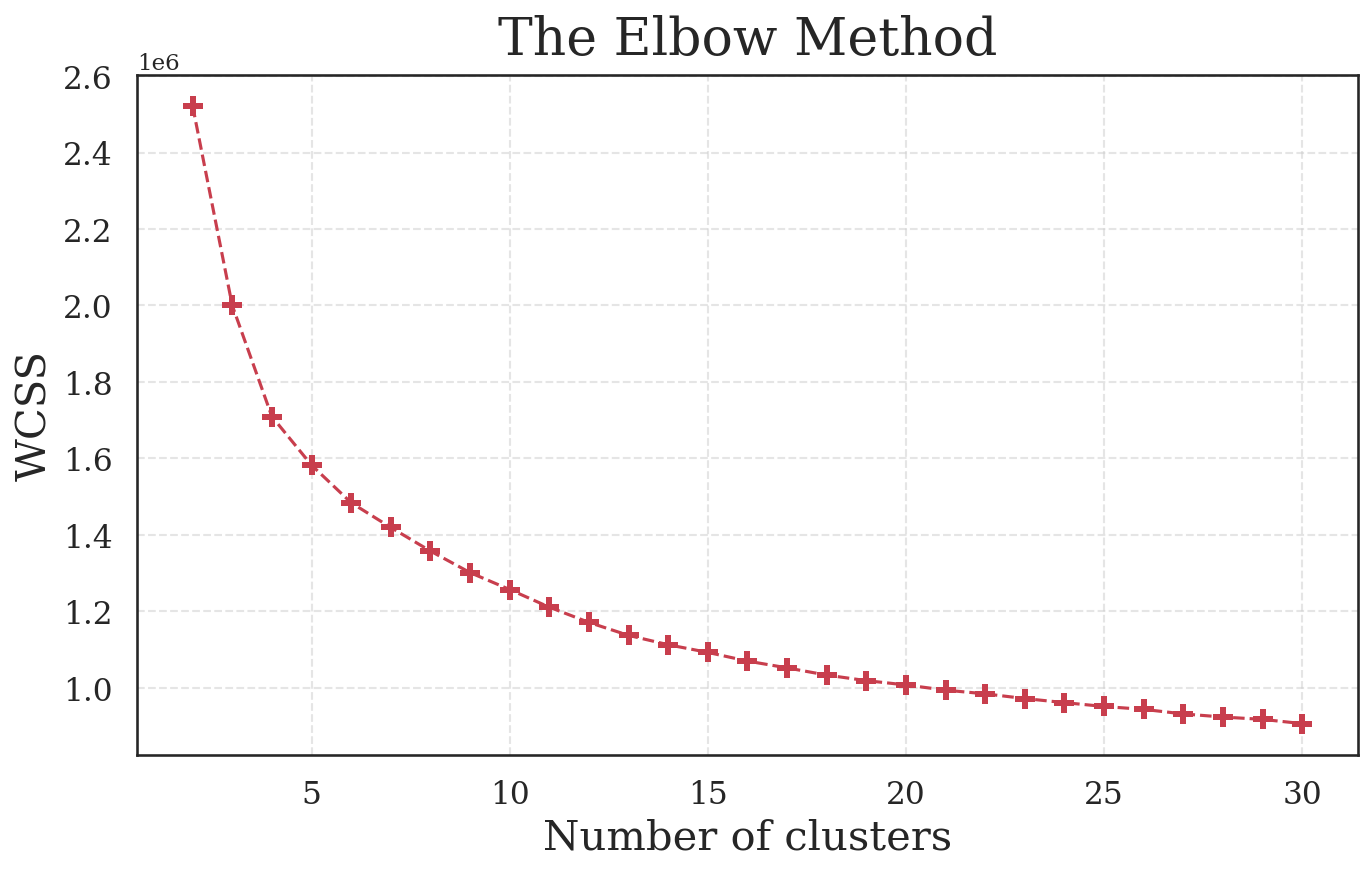

In [247]:
#matplotlib font type and seaborn style
sns.set( style = 'white' )
plt.rc('font', family='serif')

plt.figure( figsize=(10.5,6),
           dpi = 150,
           facecolor=c_background
          )
plt.axes().set_facecolor(c_background)

plt.plot(range(2, 31),wcss,
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )


plt.title('The Elbow Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('WCSS', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

#create a list of K-Means models. Each element is a KMeans model with a specific number of clusters
DF = pd.DataFrame(songs.drop(['track_name', 'artist_name'], axis = 1))
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++',max_iter=1000).fit(DF) for i in range(1,30)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(DF, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]

#save the silhouette coefficient in an array
sil_values = np.array( sil_values )

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#GENERAL PLOT SETTINGS

#style sheet
plt.style.use('seaborn-paper')

#background in plots
c_background = '#FFFFFF'

#color for the XYZ planes for the 3d plots
rgba_planes = (231/255, 231/255, 231/255)


%matplotlib inline

/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/4243005364.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )


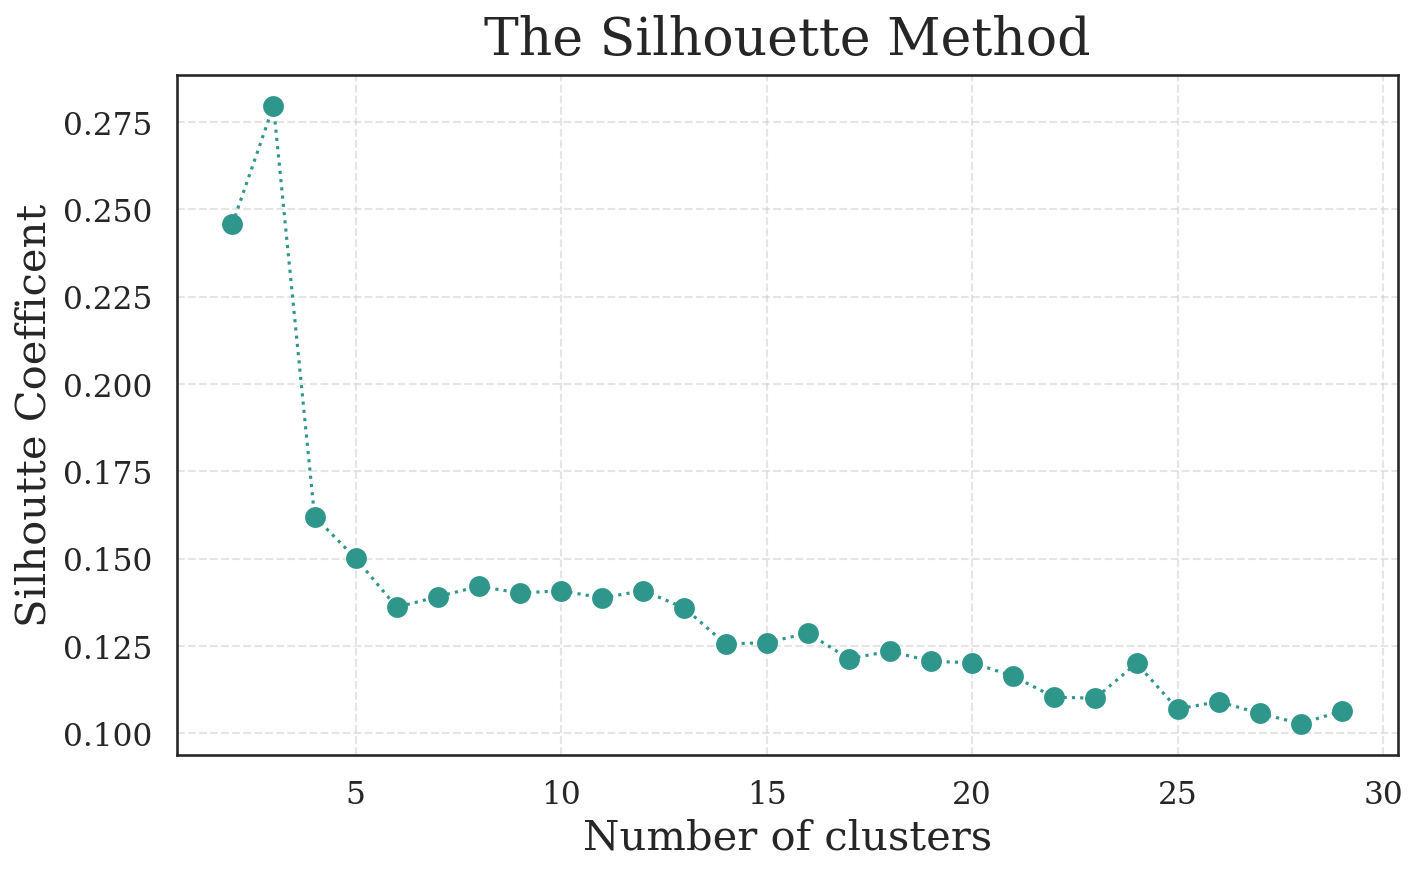

In [248]:
sns.set( style = 'white' )
plt.rc('font', family='serif')

plt.figure( figsize=(10.5,6),
           dpi = 150,
           facecolor=c_background
          )
plt.axes().set_facecolor = c_background

plt.plot(range(2, 30),sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )


plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()

/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/1198749543.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid( b = True, linestyle = 'dashed', alpha = 0.5 )


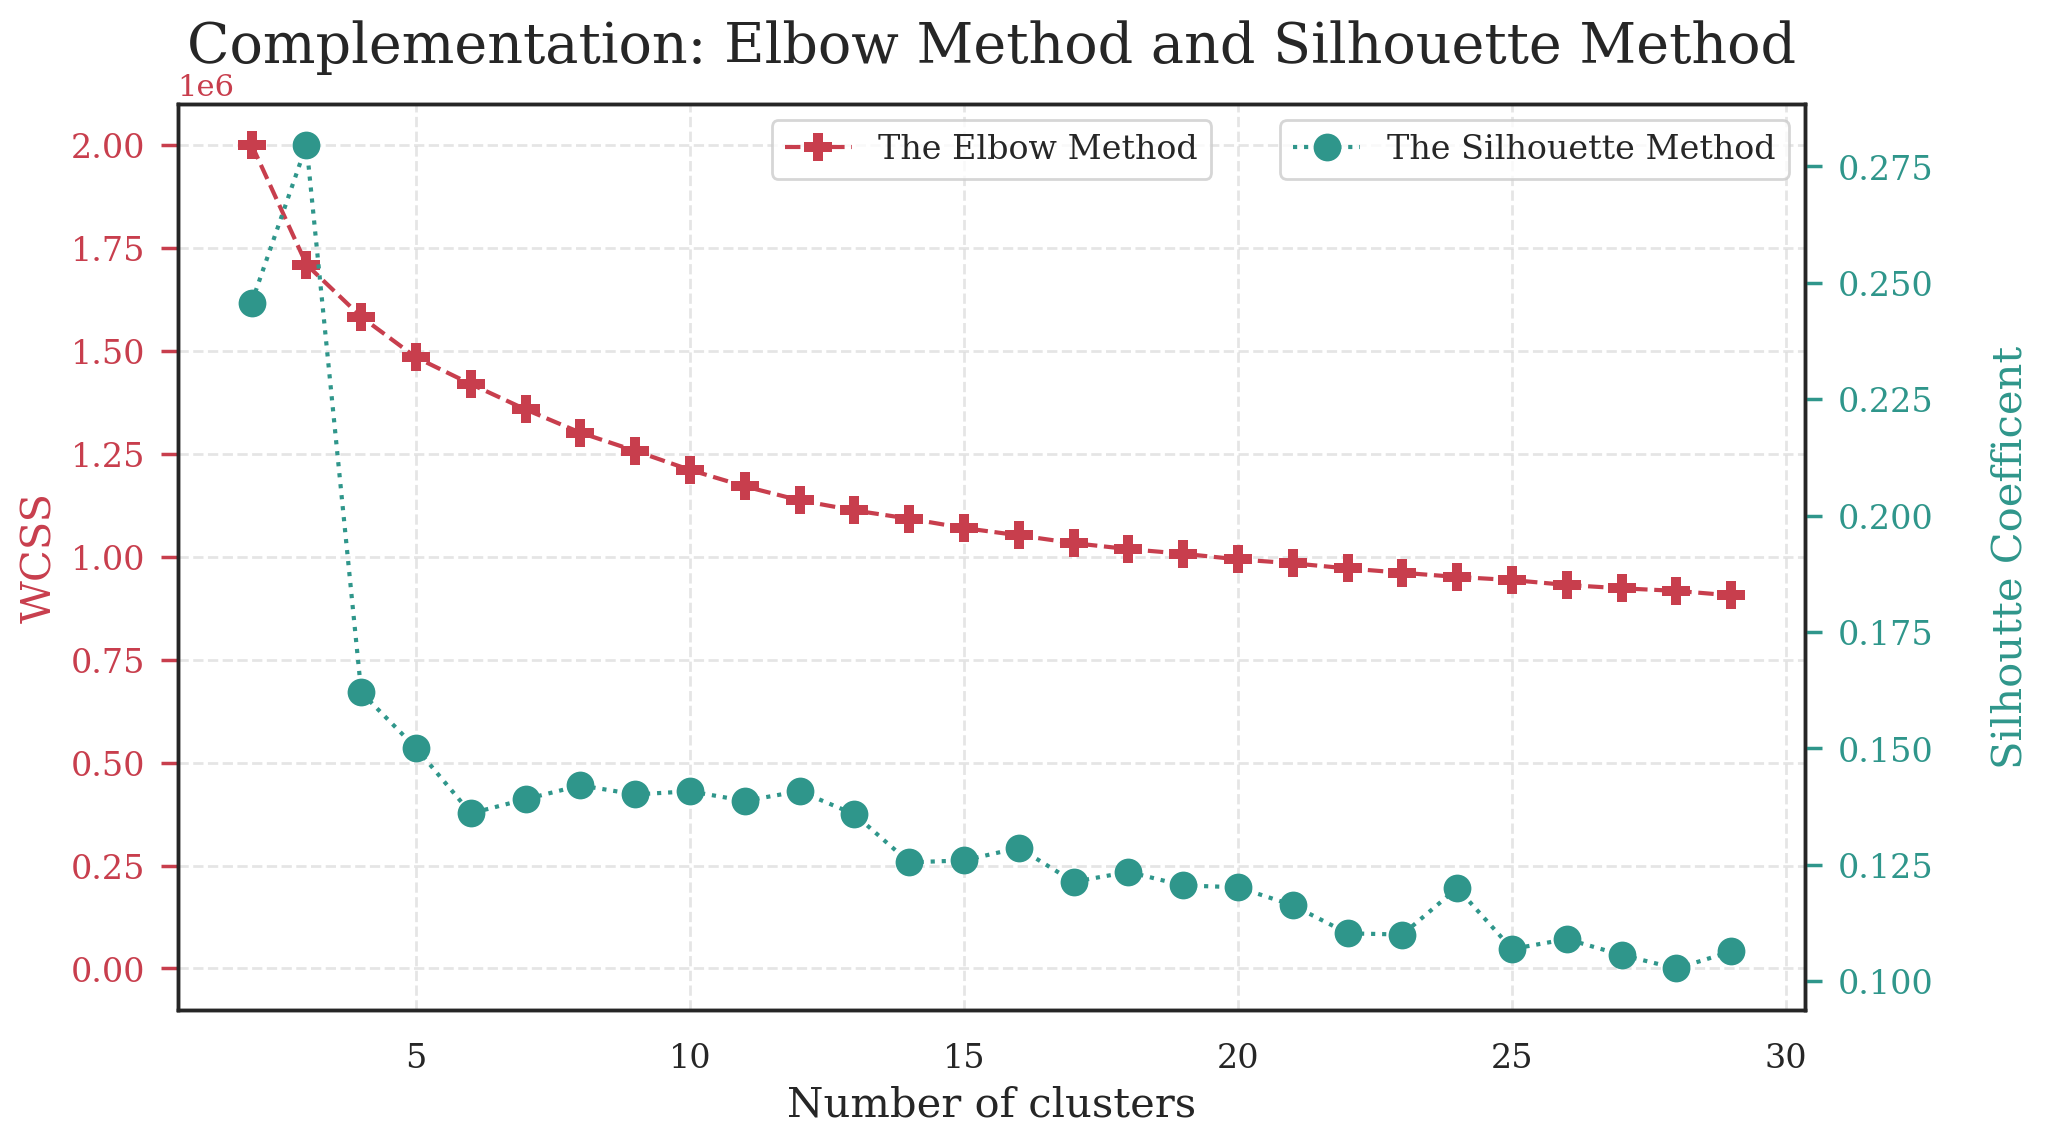

In [245]:
sns.set( style = 'white' )
plt.rc('font', family='serif')

fig , ax1 = plt.subplots( figsize = (10.5,6), 
                         facecolor = c_background,
                         dpi = 200 )

ax1.set_title('Complementation: Elbow Method and Silhouette Method', size = 20, pad = 15 )
ax1.set_facecolor(c_background)

#--------------- WCSS -----------------
ax1.plot( range(2, 30),wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )
#----------- optimal number of clusters -----------------
ax1.plot( [5,5], [0,100],
         linestyle = ':', linewidth = 2,
         color = '#572F96' ,
        )

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12, colors = '#C83E4D' )
ax1.yaxis.label.set_color( '#C83E4D' )
plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot(range(2, 30),sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12, colors = '#2F968B' )
ax2.yaxis.label.set_color( '#2F968B' )
plt.legend(loc=0, prop = {'size':12})


ax1.grid( b = True, linestyle = 'dashed', alpha = 0.5 )

plt.show()



In [49]:
print( 'Max. Silhouette Score:', sil_values[ np.argmax(sil_values) ] )
print( 'Optimal number of cluters:', np.argmax(sil_values) + 1 + 1 )

Max. Silhouette Score: 0.27962067695011766
Optimal number of cluters: 3


In [224]:
DF = pd.DataFrame(songs.drop(['track_name', 'artist_name'], axis = 1))
kmeans = KMeans(n_clusters=3)
songs['Cluster'] = kmeans.fit_predict(DF)

## Recomendación basada en a distancia

In [225]:
from sklearn.metrics.pairwise import cosine_similarity

In [236]:
def find_song_database(name, artist, songs):
    result = songs[(songs.artist_name == str(artist)) & (songs.track_name == str(name))]
    if len(result) == 0:
        return None
    return result.drop(['track_name', 'artist_name', 'Cluster'], axis = 1)

def find_similar(user,top_n):
    top_n+=1
    global songs
    database = songs[songs.popularity > 0.5].reset_index(drop = True)
    indx_names = database[['track_name', 'artist_name', 'Cluster']]
    songs_train = database.drop(['track_name', 'artist_name', 'Cluster'], axis = 1)
    
    if type(song) != type(None):
        indx_song = user.index
        cos_dists = cosine_similarity(user, songs_train)
        indx_names.loc[:,['result']] = cos_dists[indx_song[0]]
        

        indx_names = indx_names.sort_values(by = ['result'], ascending = False)

        return indx_names[1:top_n].reset_index(drop = True)
    
    else:
        print("Song not found")
        return None
    

In [227]:
consumo = [("break up with your girlfriend, i'm bored",'Ariana Grande'),
 ("Wow.",'Post Malone'),
 ("Don't Let Me Down (feat. Daya)","The Chainsmokers"),
 ("Scentist","VIXX"),
           ('7 rings','Ariana Grande'),#r&B
           ('Desperado','Rihanna'),
           ('Love Myself',"Olivia O'Brien"),
           ('Talking Body','Tove Lo'),
           ('Let Her Go','6LACK'),
           ('Been That Way','Bryson Tiller'),#RAP
           ('Going Bad (feat. Drake)','Meek Mill'),
           ('Untouchable','Eminem'),
           ('Eat Or Starve','Lil Baby'),
           ('Outta Time','Future'),
           ('SICKO MODE','Travis Scott'),#Reggaeton
           ('MIA (feat. Drake)','Bad Bunny'),
           ('Secreto','Anuel Aa'),
           ('Burberry','Juhn'),
           ('Con Calma','Daddy Yankee'),
           ('Baila Baila Baila','Ozuna'),
          ]

In [228]:
x = pd.DataFrame()

In [229]:
x = pd.DataFrame()
for song,artist in consumo:
    x = x.append(find_song_database(song,artist,songs))

/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3515199265.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(find_song_database(song,artist,songs))
/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3515199265.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(find_song_database(song,artist,songs))
/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3515199265.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(find_song_database(song,artist,songs))
/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3515199265.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [254]:
x

,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,...,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
173014,0,0,0,0,0,0,0,0,0,1,...,0.924721,-0.375685,-0.064366,-0.489819,-0.549796,0.713529,1.368876,-0.156670,1.693669,-0.461104
169553,0,0,0,0,0,0,0,0,0,0,...,1.501206,-0.719737,-0.121302,-0.489812,-0.575014,0.361923,1.368876,0.308515,-0.573471,-0.268844
38122,0,0,0,0,0,0,0,0,0,1,...,-0.109718,-0.222434,1.127488,-0.479315,-0.337966,0.752374,-0.730526,0.459443,1.362200,-0.188095
125460,0,0,0,0,0,0,0,0,0,0,...,0.359013,-0.423164,0.994638,-0.489819,-0.353097,0.950434,1.368876,-0.315684,1.043936,1.253853
2346,0,0,0,0,0,0,0,0,0,1,...,0.919334,-0.474898,-0.948768,-0.489819,-0.638563,-0.195745,1.368876,1.090110,-1.538070,-0.522627
35225,0,0,0,0,0,0,0,0,0,1,...,0.703826,-0.409090,0.148194,-0.489819,-0.569971,0.725033,1.368876,-0.414327,-0.753510,-0.507246
87852,0,0,0,0,0,0,0,0,0,1,...,0.531419,-0.178040,0.189946,-0.489819,-0.675381,0.641674,1.368876,-0.430498,-0.571561,0.042617
141881,0,0,0,0,0,0,0,0,0,1,...,0.978598,0.027785,0.721346,-0.489819,-0.669329,0.687021,1.368876,-0.468769,0.075486,-1.310891
83062,0,1,0,0,0,1,0,0,0,0,...,1.097128,-0.487241,0.186151,-0.489561,-0.141267,0.415273,1.368876,-0.194941,1.241160,-0.195785
15076,0,0,0,0,0,0,0,0,0,0,...,-0.142044,-0.301023,0.713755,-0.489819,-0.564927,0.515803,-0.730526,0.879888,2.123362,1.330757


In [230]:
means = []
for i in range(39):
    means.append(x.iloc[:, i].mean())

In [231]:
user_index = x.index

In [232]:
user = pd.DataFrame(np.matrix(means))
user.columns = x.columns

In [255]:
user

,genre_A Capella,genre_Alternative,genre_Anime,genre_Blues,genre_Children's Music,genre_Children’s Music,genre_Classical,genre_Comedy,genre_Country,genre_Dance,...,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0.0,0.05,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.3,...,0.927146,-0.218994,0.387134,-0.487784,-0.388881,0.643958,0.634085,0.223725,0.052952,0.079146


In [233]:
songs = songs.drop(x.index)

## Resultado

In [250]:
find_similar(user,5)

/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2077/3169291242.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indx_names.loc[:,['result']] = cos_dists[indx_song[0]]


,track_name,artist_name,Cluster,result
0,One Kiss (with Dua Lipa),Calvin Harris,2,0.934361
1,Giant (with Rag'n'Bone Man),Calvin Harris,2,0.921403
2,Look What You Made Me Do,Taylor Swift,2,0.917515
3,No Stylist,French Montana,2,0.915498
4,New Rules,Dua Lipa,2,0.915410
